# The math underneath the linear regression model

The goal is to try and replicate, and thus understand, the math that happens when we call the fit method of the SGDRegressors' model <i>(for 1 featured linear regression porblems)</i>.<br>
Here is what we're going to do:
1. Generate a random dataset to work on
2. Get the optimal parameters for the regression line of our dataset
3. Train sklearns' linear model and retrieve its regression line parameters
4. <i>Train</i> our <i>"model"</i> and retrieve its regression line parameters
5. Finally, compare.

### 1. Creating the dataset:
- I'll use a modified version of sklearns' make_regression, as to simplify the dataset, since we'll only handle 1 featured linear regression problems
- All the math is done in the `<a href="umath.py" target="_blank">umath</a>` module

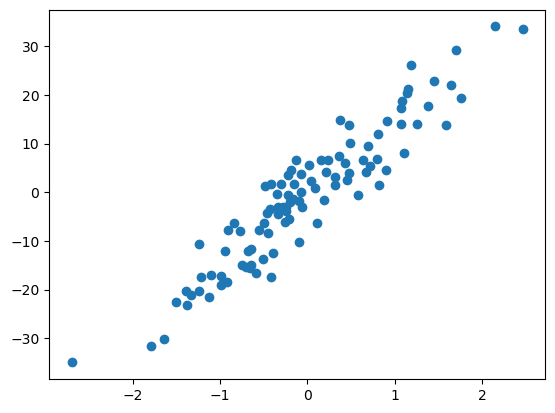

In [1]:
import umath
from matplotlib import pyplot as plt

x, y = umath.make_regression()
plt.scatter(x, y)

### 2. Get the optimal parameters:
- Now that we have our dataset, lets get the optimal parameters for our regression line trough statistical linear interpolation

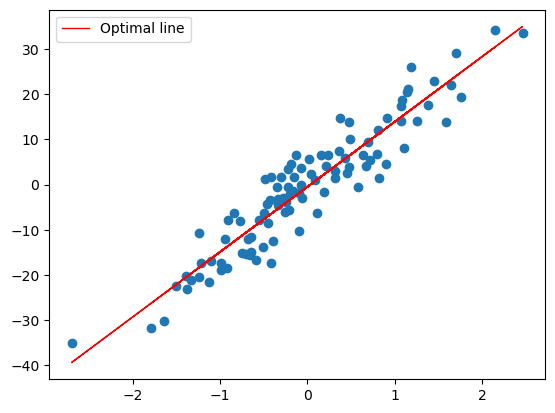

Optimal: y = x * 14.418278836789934 -0.487130767363343


In [2]:
(optimal_a, optimal_b) = umath.get_optimal_params(x, y)

plt.scatter(x, y)
plt.plot(x, umath.compute_line(x, optimal_a, optimal_b), c= 'Red', linewidth= 1, label= 'Optimal line')
plt.legend()
plt.show()

print(f'Optimal: y = x * {optimal_a} {["+ " +str(optimal_b), str(optimal_b)][int(optimal_b < 0)]}')

We can see it passes perfectly trough what seems to be the middle of the dataset.
<br>
### 3. sklearns' model parameters:
- Now, let's train a sklearn model and retrieve its parameters
- I was not able to find where to extract the parameters of the line from the model directly, so i computed them my self

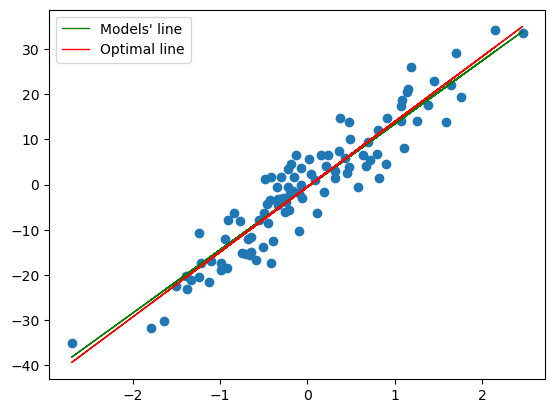

Model: y = x * 13.975171509944055 -0.5086162331009595


In [3]:
from sklearn.linear_model import SGDRegressor
import numpy as np

model = SGDRegressor(max_iter=5000, eta0=0.001)
model.fit(np.array(x).reshape(-1, 1), y)

(model_a, model_b) = umath.get_model_params(model)

plt.scatter(x, y)
plt.plot(x, umath.compute_line(x, model_a, model_b), c= 'Green', linewidth= 1, label= 'Models\' line')
plt.plot(x, umath.compute_line(x, optimal_a, optimal_b), c= 'Red', linewidth= 1, label= 'Optimal line')
plt.legend()
plt.show()

print(f'Model: y = x * {model_a} {["+ " +str(model_b), str(model_b)][int(model_b < 0)]}')

We see a slight offset between the two lines. So even though sklearns' model trains for 5000 iteration, it still isn't  optimal. But anyhow, they are <b>pretty</b> close never the less!
<i>TBH, i thought it stops once it converges, and notify the user in case it didn't.</i>
### 4. Our "<i>model</i>" parameters:
- We are not really creating a model, and I, personally, don't feel like we are actually training anything, or that this is considered (for me) machine learning. The reason being is that what's actually being done is small and really not that complex. It's just applied mathematics, <b>and while I KNOW</b> that that's what machine learning and AI is, the scale in which it's done here is really small. But never the less this is a <b>really good</b> start to dive into what actually goes on in machine learning.
- So, as to not go into the math in here, there is a <a href="explanation.pdf" target="_blank">file explaining</a> what's going on. But in short we minimize the cost function by finding the parameters that approach the derivative of the cost functions' root, and thus the minimum of the cost function. And we do this trough Newtons' method.

Converged in 5 iterations.


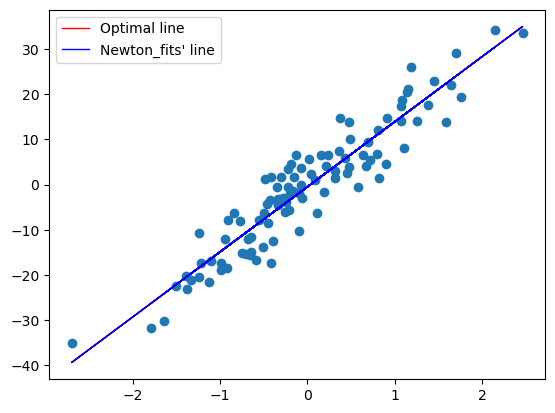

Newton: y = x * 14.418278836789932 -0.48713076736334304


In [4]:
(newton_a ,newton_b) = umath.newton_fit(x,y)

plt.scatter(x, y)
plt.plot(x, umath.compute_line(x, optimal_a, optimal_b), c= 'Red', linewidth= 1, label= 'Optimal line')
plt.plot(x, umath.compute_line(x, newton_a, newton_b), c= 'Blue', linewidth= 1, label= 'Newton_fits\' line')
plt.legend()
plt.show()

print(f'Newton: y = x * {newton_a} {["+ " +str(newton_b), str(newton_b)][int(newton_b < 0)]}')

We can't see any difference between the two lines, that's really good!

### 5. Comparison:

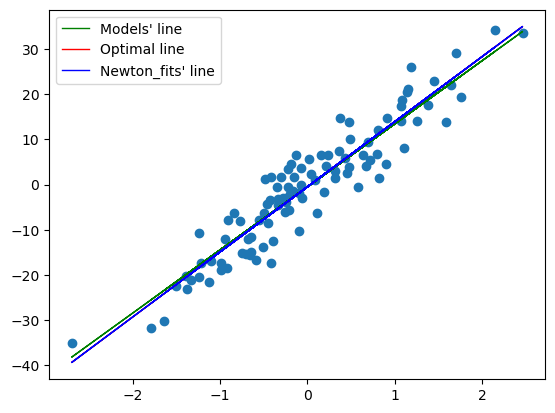

Parameters:
	Model:          y = x * 13.975171509944055   -0.5086162331009595
	Optimal:        y = x * 14.418278836789934   -0.487130767363343
	Newton_fit:     y = x * 14.418278836789932   -0.48713076736334304

Error:
	Model:          a_error = 0.4431073268458796       , b_error = 0.021485465737616505
	Newton_fit:     a_error = 1.7763568394002505e-15   , b_error = 5.551115123125783e-17


In [5]:
plt.scatter(x, y)
plt.plot(x, umath.compute_line(x, model_a, model_b), c= 'Green', linewidth= 1, label= 'Models\' line')
plt.plot(x, umath.compute_line(x, optimal_a, optimal_b), c= 'Red', linewidth= 1, label= 'Optimal line')
plt.plot(x, umath.compute_line(x, newton_a, newton_b), c= 'Blue', linewidth= 1, label= 'Newton_fits\' line')
plt.legend()
plt.show()

print('Parameters:')
print(f'\t{"Model:":<15} y = x * {model_a:<20} {["+" +str(model_b), str(model_b)][int(model_b < 0)]}')
print(f'\t{"Optimal:":<15} y = x * {optimal_a:<20} {["+" +str(optimal_b), str(optimal_b)][int(optimal_b < 0)]}')
print(f'\t{"Newton_fit:":<15} y = x * {newton_a:<20} {["+" +str(newton_b), str(newton_b)][int(newton_b < 0)]}')
print('\nError:')
print(f'\t{"Model:":<15} a_error = {abs(model_a - optimal_a):<25}, b_error = {abs(model_b - optimal_b)}')
print(f'\t{"Newton_fit:":<15} a_error = {abs(newton_a - optimal_a):<25}, b_error = {abs(newton_b - optimal_b)}')

<br><hr><br>
There is no conclusion really, I'll just let the numbers speak for themselves.
<br>
<b>Never the less</b>, I'm pretty sure there are reasons why sklearns' model preformed worse, maybe it's optomized for n-featured linear regression problems or other reasons..
<br>Not sure / I don't know, what I'm sure of / know tho is that I'm pretty satisfied with the results! 😁